# Convolutional autoencoder

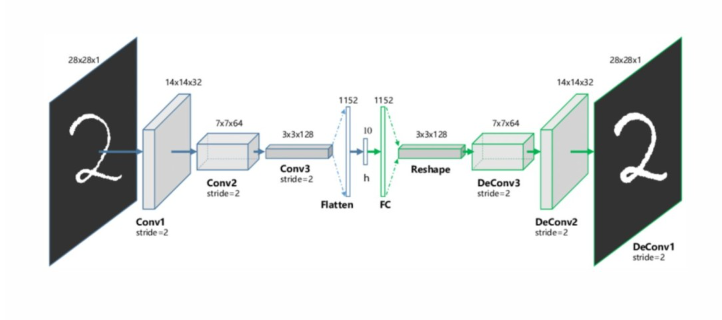

# What is an Autoencoder?
An autoencoder is a type of artificial neural network used to learn efficient representations of data, typically for the purpose of dimensionality reduction or feature learning

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential, Model
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Reshape
from keras import regularizers
import time

In [4]:
(X_train,_),(X_test,_) = mnist.load_data()
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

In [5]:
X_train = X_train.reshape((len(X_train), 28, 28, 1))
X_test = X_test.reshape((len(X_test), 28, 28, 1))

In [6]:
X_train.shape

(60000, 28, 28, 1)

In [10]:
autoencoder = Sequential()
#encoder
# kernel (filter) 32, dimension of kernel 3x3
autoencoder.add(Conv2D(16, (3, 3), activation='relu', input_shape=(28,28,1)))
autoencoder.add(MaxPooling2D(pool_size=(2, 2)))

autoencoder.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
# get feature map
autoencoder.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

# 4 x 4 x 8 = 128
autoencoder.add(Conv2D(8, (3, 3), activation='relu', padding='same', strides=(2,2)))
autoencoder.add(Flatten())
autoencoder.add(Reshape((4,4,8)))

# decoder - up
autoencoder.add(Conv2D(filters=8, kernel_size=(3,3), activation='relu', padding='same'))
autoencoder.add(UpSampling2D((2,2)))
autoencoder.add(Conv2D(filters=8, kernel_size=(3,3), activation='relu', padding='same'))
autoencoder.add(UpSampling2D((2,2)))
# retorn to 16
autoencoder.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu'))
autoencoder.add(UpSampling2D((2,2)))
# bring one image
autoencoder.add(Conv2D(filters=1, kernel_size=(3,3), activation='sigmoid', padding='same'))
autoencoder.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_13 (Conv2D)                   │ (None, 26, 26, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 13, 13, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 13, 13, 8)           │           1,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 7, 7, 8)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 4, 4, 8)             │             584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape_1 (Reshape)                  │ (None, 4, 4, 8)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 4, 4, 8)             │             584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_3 (UpSampling2D)       │ (None, 8, 8, 8)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 8, 8, 8)             │             584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_4 (UpSampling2D)       │ (None, 16, 16, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 14, 14, 16)          │           1,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_5 (UpSampling2D)       │ (None, 28, 28, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 28, 28, 1)           │             145 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,385 (17.13 KB)

 Trainable params: 4,385 (17.13 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
import keras
print("Keras version:", keras.__version__)

Keras version: 3.4.1


In [15]:
autoencoder.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics = ['accuracy'])
start_time = time.time()
early = keras.callbacks.EarlyStopping(monitor='loss',
                                         patience=2,
                                         min_delta=0.001,
                                         mode='auto',
                                         restore_best_weights=True
                                         )
''' x and y = X_train because I plan to input an image of a number and output
the same image
'''
autoencoder.fit(X_train, X_train,
                epochs=59,
                batch_size=256,
                validation_data=(X_test, X_test), callbacks=[early])
end_time = time.time()

training_time = end_time - start_time
print("Training time: {:.2f} seconds".format(training_time))

Epoch 1/59
235/235 ━━━━━━━━━━━━━━━━━━━━ 69s 277ms/step - accuracy: 0.8049 - loss: 0.1386 - val_accuracy: 0.8061 - val_loss: 0.1286
Epoch 2/59
235/235 ━━━━━━━━━━━━━━━━━━━━ 87s 298ms/step - accuracy: 0.8068 - loss: 0.1275 - val_accuracy: 0.8078 - val_loss: 0.1194
Epoch 3/59
235/235 ━━━━━━━━━━━━━━━━━━━━ 77s 278ms/step - accuracy: 0.8089 - loss: 0.1190 - val_accuracy: 0.8087 - val_loss: 0.1137
Epoch 4/59
235/235 ━━━━━━━━━━━━━━━━━━━━ 68s 289ms/step - accuracy: 0.8101 - loss: 0.1137 - val_accuracy: 0.8093 - val_loss: 0.1095
Epoch 5/59
235/235 ━━━━━━━━━━━━━━━━━━━━ 67s 284ms/step - accuracy: 0.8104 - loss: 0.1101 - val_accuracy: 0.8100 - val_loss: 0.1068
Epoch 6/59
235/235 ━━━━━━━━━━━━━━━━━━━━ 80s 277ms/step - accuracy: 0.8112 - loss: 0.1075 - val_accuracy: 0.8103 - val_loss: 0.1047
Epoch 7/59
235/235 ━━━━━━━━━━━━━━━━━━━━ 71s 304ms/step - accuracy: 0.8115 - loss: 0.1054 - val_accuracy: 0.8106 - val_loss: 0.1029
Epoch 8/59
235/235 ━━━━━━━━━━━━━━━━━━━━ 66s 281ms/step - accuracy: 0.8116 - loss: 0

In [17]:
autoencoder.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_13 (Conv2D)                   │ (None, 26, 26, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 13, 13, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 13, 13, 8)           │           1,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 7, 7, 8)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 4, 4, 8)             │             584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape_1 (Reshape)                  │ (None, 4, 4, 8)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 4, 4, 8)             │             584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_3 (UpSampling2D)       │ (None, 8, 8, 8)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 8, 8, 8)             │             584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_4 (UpSampling2D)       │ (None, 16, 16, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 14, 14, 16)          │           1,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_5 (UpSampling2D)       │ (None, 28, 28, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 28, 28, 1)           │             145 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,157 (51.40 KB)

 Trainable params: 4,385 (17.13 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 8,772 (34.27 KB)

In [22]:
print(autoencoder.get_layer(index=5).name)
autoencoder.get_layer(index=5).output

flatten_3


<KerasTensor shape=(None, 128), dtype=float32, sparse=False, name=keras_tensor_171>

In [26]:
autoencoder.get_layer(index=0).input

<KerasTensor shape=(None, 28, 28, 1), dtype=float32, sparse=None, name=keras_tensor_150>

In [27]:
encoder = Model(inputs=autoencoder.get_layer(index=0).input, outputs=autoencoder.get_layer(index=5).output)
encoder.summary()

encoded_imgs = encoder.predict(X_test)
decoded_imgs = autoencoder.predict(X_test)

Model: "functional_40"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 26, 26, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 13, 13, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 13, 13, 8)           │           1,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 7, 7, 8)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 4, 4, 8)             │             584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 128)                 │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,904 (7.44 KB)

 Trainable params: 1,904 (7.44 KB)

 Non-trainable params: 0 (0.00 B)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


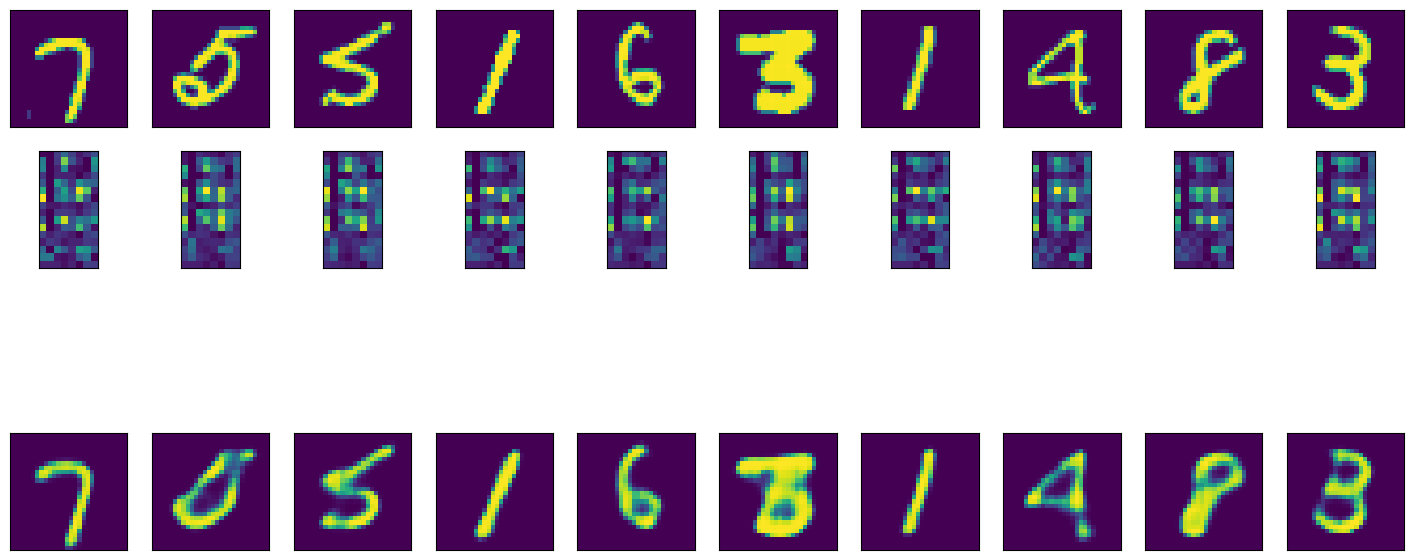

In [28]:

# random 10 images
img_test = np.random.randint(X_test.shape[0], size = 10)
plt.figure(figsize=(18,18))
for i, index in enumerate(img_test):
    # original
    ax = plt.subplot(10,10,i+1)
    plt.imshow(X_test[img_test[i]].reshape(28,28))
    plt.xticks([])
    plt.yticks([])
    # encode image
    ax = plt.subplot(10,10,i+11)
    plt.imshow(encoded_imgs[index].reshape(16,8))
    plt.xticks([])
    plt.yticks([])
    # decode image
    ax = plt.subplot(10,10,i+1+10*3)
    plt.imshow(decoded_imgs[index].reshape(28,28))
    plt.xticks([])
    plt.yticks([])
plt.show()

## Notice that the result it's no good, some images were decoded incorrectly